In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_data = "1551/json"

In [3]:
import os

os.listdir(path_to_data)[:10]

['Є-100.json',
 'Є-1000.json',
 'Є-1001.json',
 'Є-1007.json',
 'Є-101.json',
 'Є-1015.json',
 'Є-1016.json',
 'Є-1030.json',
 'Є-1031.json',
 'Є-1032.json']

In [4]:
import json

with open(os.path.join(path_to_data, 'Є-100.json'), 'r') as f:
    print(json.dumps(json.load(f)[0], indent=4, ensure_ascii=False))

{
    "StatusTitle": "Роз`яснено по суті порушеного питання",
    "CallZCdate": "2015-01-30 00:00:00",
    "CallZReply": "",
    "CallZText": "Здравствуйте.\r\n\r\nВо время работ по обрезке тополя 04.12.2014 намеренными действиями сотрудников КП «Зализнычного» был нанесен материальный ущерб металлическому гаражу и автомобилю, который находился в это время в гараже (фото во вложении).\r\nИнформацию о  том, что был нанесен ущерб сотрудники КП «Зализнычного» утаили. Т.к. с их стороны не последовало никаких действий для решения данной ситуации.\r\n15.12.2014 была направлена претензия на действия сотрудников КП «Зализнычного».  Скан-копия документа прикреплена к данному обращению.\r\n30.12.2014 в почтовом ящике был  обнаружен ответ на претензию (так же скан-копия документа находится во вложенном файле), подготовленный тем  же сотрудником, физическими действиями которого был причинен данный материальный ущерб. Считаю данный факт вопиющим нарушением всех возможных моральных и юридических норм

## Data preparation

In [5]:
from tqdm.notebook import tqdm

samples_json_list = []

for name in tqdm(os.listdir(path_to_data)):
    with open(os.path.join(path_to_data, name), 'r') as f:
        sample = json.load(f)[0]
        samples_json_list.append(sample)

len(samples_json_list)

127329

In [6]:
import pandas as pd

data = pd.DataFrame(samples_json_list)
data.head(5)

,StatusTitle,CallZCdate,CallZReply,CallZText,CallZManager,CallZType,CallDate,CallCode,FbId,Enabled,PublicAgree,CallZStatusId,CallId,SyncTime,PX,PY,showStatus,files,feedfiles,reply
0,Роз`яснено по суті порушеного питання,2015-01-30 00:00:00,,Здравствуйте.\r\n\r\nВо время работ по обрезке...,КП ”Залізничне” [Шкуро Максим Юрійович],"Аварійних служб (Ліфтові служби, ”Київенерго”,...",2015-01-15 12:48:20,Є-100,107098,0,1,9,3034684,2015-02-02 11:48:03,50.432537,30.473316,,"[{'id': '50675', 'InOut': '0', 'file': '/feedb...",,[]
1,Виконано,2014-07-17 00:00:00,,Плановое отключение горячей воды должно было з...,ПАТ ”Київенерго” - ТРМ [Фоменко Олександр Вале...,Відсутність ГВП,2014-07-02 09:42:51,Є-1000,61187,1,1,5,2806307,2014-07-26 11:48:21,50.447958,30.631365,,,,[]
2,Потребує додаткового фінансування,2014-07-17 00:00:00,,Дитячий майданчик у дворі будинку 15 по вулиці...,КП РЕО-6 [Кулик Олександр Михайлович],Будівництво/дооблаштування дитячого майданчику,2014-07-02 10:48:34,Є-1001,61190,1,1,7,2806415,2014-12-17 11:32:20,50.461693,30.360703,,"[{'id': '30085', 'InOut': '0', 'file': '/feedb...",,[]
3,Чекає на перевіку контр.відділом,2015-05-20 00:00:00,,"Я живу на останньому поверсі, протягом декільк...",ЖРЕО - 409 [Горбунов Ярослав Володимирович],Ремонт дахів,2015-05-05 15:56:11,Є-1007,134699,1,1,22,3147158,2015-05-20 11:48:07,50.487496,30.607282,,"[{'id': '70483', 'InOut': '0', 'file': '/feedb...",,[]
4,Виконано,2014-01-23 00:00:00,,З 17.01.2014р відсутне опалення 20.01.2014 п...,КП ”Центральний” [Крушановський Сергій Іванович],Відсутність опалення,2014-01-20 14:04:18,Є-101,40898,1,1,5,2694458,2014-01-21 11:32:02,50.465747,30.510614,,,,[]


In [7]:
data['CallZType'].value_counts()

Відсутність ГВП                                                                     13273
Укладання та ремонт асфальтного покриття                                             6632
Відсутність опалення                                                                 6020
Перевірка дозвільної документації, демонтаж кіосків, ларків                          3654
Прибирання та санітарний стан територій                                              3084
                                                                                    ...  
Подяки заступникам голови КМДА                                                          1
Про заробітну плату на промислових підприємствах міста                                  1
Підприємницька діяльність                                                               1
Надання допомоги на погашення заборгованості по оплаті за ЖКП                           1
Допомога на поховання безробітніх осіб,що не перебували на обліку в центрі зайня        1
Name: Call

In [8]:
data['CallZType'].value_counts(normalize=True).head(20)

Відсутність ГВП                                                                     0.104242
Укладання та ремонт асфальтного покриття                                            0.052086
Відсутність опалення                                                                0.047279
Перевірка дозвільної документації, демонтаж кіосків, ларків                         0.028697
Прибирання та санітарний стан територій                                             0.024221
Не працює пасажирський ліфт                                                         0.021346
Відсутність освітлення у під’їзді за відсутності/несправності лампочок              0.020710
Відновлення благоустрою після вик. планових,аварійних робіт на об’єктах благоуст    0.018794
Незадовільна температура ГВП                                                        0.018095
Технічний стан проїжджих частин вулиць та тротуарів                                 0.017121
Ремонт під’їзду;                                                      

### Extracting samples from top N types

In [9]:
def extract_top_n_types(df, column, n):
    number_of_samples_extracted = sum(df[column].value_counts().head(n).tolist())
    print(f'Number of samples: {number_of_samples_extracted} with {n} columns')
    return df[column].value_counts(normalize=True).head(n).index.tolist()

In [10]:
n_types = 20
top_n_columns = extract_top_n_types(data, "CallZType", n_types)

Number of samples: 61537 with 20 columns


In [11]:
top_n_columns

['Відсутність ГВП',
 'Укладання та ремонт асфальтного покриття',
 'Відсутність опалення',
 'Перевірка дозвільної документації, демонтаж кіосків, ларків',
 'Прибирання та санітарний стан територій',
 'Не працює пасажирський ліфт',
 'Відсутність освітлення у під’їзді за відсутності/несправності лампочок',
 'Відновлення благоустрою після вик. планових,аварійних робіт на об’єктах благоуст',
 'Незадовільна температура ГВП',
 'Технічний стан проїжджих частин вулиць та тротуарів',
 'Ремонт під’їзду;',
 'Відсутність опалення по стояку',
 'Перерахунок та нарахування плати за інші види житлово-комунальних послуг',
 'Освітлення в приміщенні й при вході в нього',
 'Про розгляд звернень громадян',
 'Відсутнє ХВП',
 'Прибирання приміщень',
 'Інші технічні недоліки стану ліфту',
 'ГЛ ”Несанкціонована торгівля”',
 'Незадовільна температура опалення']

In [12]:
filtered_data = data[data['CallZType'].isin(top_n_columns)].reset_index(drop=True)
filtered_data.head()

,StatusTitle,CallZCdate,CallZReply,CallZText,CallZManager,CallZType,CallDate,CallCode,FbId,Enabled,PublicAgree,CallZStatusId,CallId,SyncTime,PX,PY,showStatus,files,feedfiles,reply
0,Виконано,2014-07-17 00:00:00,,Плановое отключение горячей воды должно было з...,ПАТ ”Київенерго” - ТРМ [Фоменко Олександр Вале...,Відсутність ГВП,2014-07-02 09:42:51,Є-1000,61187,1,1,5,2806307,2014-07-26 11:48:21,50.447958,30.631365,,,,[]
1,Виконано,2014-01-23 00:00:00,,З 17.01.2014р відсутне опалення 20.01.2014 п...,КП ”Центральний” [Крушановський Сергій Іванович],Відсутність опалення,2014-01-20 14:04:18,Є-101,40898,1,1,5,2694458,2014-01-21 11:32:02,50.465747,30.510614,,,,[]
2,На доопрацюванні виконавцем,2014-07-18 00:00:00,,Спасение города нужно начинать с Ценра!!!!\r\n...,Управління контролю за благоустроєм [Роменськи...,"Перевірка дозвільної документації, демонтаж кі...",2014-07-03 16:24:17,Є-1015,61538,1,1,3,2808157,2014-12-09 17:16:04,50.447183,30.523065,,"[{'id': '30263', 'InOut': '0', 'file': '/feedb...",,[]
3,Чекає на перевіку контр.відділом,2015-05-20 00:00:00,,Відсутнє гаряче водопостачання.,ПАТ ”Київенерго” - ТРМ [Фоменко Олександр Вале...,Відсутність ГВП,2015-05-05 23:16:48,Є-1016,135078,1,1,22,3147883,2015-05-18 18:32:02,50.429536,30.607722,,,,[]
4,Виконано,2015-05-22 00:00:00,,"Отремонтируйте, пожалуйста, лифт в доме по адр...",КП ”Оболонь ліфт-сервіс” [Цибульщак Олександр ...,Інші технічні недоліки стану ліфту,2015-05-07 18:14:25,Є-1030,135726,0,1,5,3150590,2015-05-18 15:16:03,50.518279,30.517306,,,,[]


In [13]:
filtered_data.shape

(61537, 20)

### Shortening labels names for further better visualization

In [14]:
short_label_names = ['Відсутність ГВП',
                     'Укладання та ремонт асфальтного покриття',
                     'Відсутність опалення',
                     'Перевірка дозвільної документації',
                     'Прибирання та санітарний стан територій',
                     'Не працює пасажирський ліфт',
                     'Відсутність освітлення у під’їзді',
                     'Відновлення благоустрою',
                     'Незадовільна температура опалення',
                     'Технічний стан проїжджих частин',
                     'Ремонт під’їзду',
                     'Відсутність опалення по стояку',
                     'Перерахунок та нарахування плати',
                     'Освітлення в приміщенні',
                     'Про розгляд звернень громадян',
                     'Відсутнє ХВП',
                     'Прибирання приміщень',
                     'Інші технічні недоліки стану ліфту',
                     'ГЛ ”Несанкціонована торгівля”',
                     'Незадовільна температура ГВП']

In [15]:
long_to_short_labels_dict = dict(zip(top_n_columns, short_label_names))
long_to_short_labels_dict

{'Відсутність ГВП': 'Відсутність ГВП',
 'Укладання та ремонт асфальтного покриття': 'Укладання та ремонт асфальтного покриття',
 'Відсутність опалення': 'Відсутність опалення',
 'Перевірка дозвільної документації, демонтаж кіосків, ларків': 'Перевірка дозвільної документації',
 'Прибирання та санітарний стан територій': 'Прибирання та санітарний стан територій',
 'Не працює пасажирський ліфт': 'Не працює пасажирський ліфт',
 'Відсутність освітлення у під’їзді за відсутності/несправності лампочок': 'Відсутність освітлення у під’їзді',
 'Відновлення благоустрою після вик. планових,аварійних робіт на об’єктах благоуст': 'Відновлення благоустрою',
 'Незадовільна температура ГВП': 'Незадовільна температура опалення',
 'Технічний стан проїжджих частин вулиць та тротуарів': 'Технічний стан проїжджих частин',
 'Ремонт під’їзду;': 'Ремонт під’їзду',
 'Відсутність опалення по стояку': 'Відсутність опалення по стояку',
 'Перерахунок та нарахування плати за інші види житлово-комунальних послуг': '

In [16]:
filtered_data['CallZType'] = filtered_data['CallZType'].map(long_to_short_labels_dict)
filtered_data['CallZType'].head()

0                       Відсутність ГВП
1                  Відсутність опалення
2     Перевірка дозвільної документації
3                       Відсутність ГВП
4    Інші технічні недоліки стану ліфту
Name: CallZType, dtype: object

In [17]:
!pip install tokenize_uk

You should consider upgrading via the 'c:\users\orest.rehusevych\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


### Cleaning text data

In [18]:
import re
import string

filtered_data['cleaned_text'] = filtered_data['CallZText'].apply(lambda s:
                                                                 s.translate(
                                                                     str.maketrans(string.punctuation, ' '*len(string.punctuation)))
                                                                )
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.lower())
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.replace('\r', ' '))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.replace('\n', ' '))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.replace('\t', ' '))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.replace('«', ' '))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.replace('»', ' '))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.replace('\x1a', ' '))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.replace('\x00', ' '))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: re.sub(' +', ' ', s))
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.lstrip())
filtered_data['cleaned_text'] = filtered_data['cleaned_text'].apply(lambda s: s.rstrip())
filtered_data['cleaned_text']

0        плановое отключение горячей воды должно было з...
1        з 17 01 2014р відсутне опалення 20 01 2014 при...
2        спасение города нужно начинать с ценра неужели...
3                           відсутнє гаряче водопостачання
4        отремонтируйте пожалуйста лифт в доме по адрес...
                               ...                        
61532    прошу срочно принять меры к восстановлению раб...
61533    вимагаю вирішити питання щодо несанкціонованої...
61534    близько тижня тому утворилася яма на дорозі пе...
61535    добрый день свет возле подъезда у нас так и не...
61536    один лифт не работает стабильно не смотря на п...
Name: cleaned_text, Length: 61537, dtype: object

### Tokenization (for later)

In [19]:
from tokenize_uk.tokenize_uk import tokenize_words

filtered_data['tokenized_text'] = filtered_data['cleaned_text'].apply(lambda text: tokenize_words(text))
filtered_data['tokenized_text']

0        [плановое, отключение, горячей, воды, должно, ...
1        [з, 17, 01, 2014, р, відсутне, опалення, 20, 0...
2        [спасение, города, нужно, начинать, с, ценра, ...
3                       [відсутнє, гаряче, водопостачання]
4        [отремонтируйте, пожалуйста, лифт, в, доме, по...
                               ...                        
61532    [прошу, срочно, принять, меры, к, восстановлен...
61533    [вимагаю, вирішити, питання, щодо, несанкціоно...
61534    [близько, тижня, тому, утворилася, яма, на, до...
61535    [добрый, день, свет, возле, подъезда, у, нас, ...
61536    [один, лифт, не, работает, стабильно, не, смот...
Name: tokenized_text, Length: 61537, dtype: object

## Train / Test splitting

In [20]:
from sklearn.model_selection import train_test_split

random_seed = 42
test_size = 0.25

X_cleaned = filtered_data['cleaned_text']
y_cleaned = filtered_data['CallZType']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cleaned, y_cleaned, test_size=test_size, 
                                                    random_state=random_seed)
X_train_1.shape, y_train_1.shape, X_test_1.shape, y_test_1.shape

((46152,), (46152,), (15385,), (15385,))

### Preparing full report on model's performance

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(ground_truth, predictions):
    print(f"Accuracy:  {accuracy_score(ground_truth, predictions)}")
    
    # Average = 'macro'
    # Calculate metrics for each label, and find their unweighted mean. 
    # This does not take label imbalance into account.
    print(f"Precision: {precision_score(ground_truth, predictions, average='macro')}")
    print(f"Recall:    {recall_score(ground_truth, predictions, average='macro')}")
    print(f"F1 score:  {f1_score(ground_truth, predictions, average='macro')}")    

In [51]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

def visualize_confusion_matrix(clf, X_test, y_test):
    _, ax = plt.subplots(figsize=(16, 12))
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation='vertical')
    plt.show()

## BoW (based on CountVectorizer) + LogisticRegression

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train_1)
X_test_counts = count_vectorizer.transform(X_test_1)
X_train_counts.shape, X_test_counts.shape

((46152, 124741), (15385, 124741))

In [24]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression(n_jobs=-1, verbose=2, random_state=random_seed)
log_r.fit(X_train_counts, y_train_1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   43.5s finished


LogisticRegression(n_jobs=-1, random_state=42, verbose=2)

In [25]:
log_r_preds = log_r.predict(X_test_counts)
log_r_preds.shape

(15385,)

In [26]:
evaluate_model(y_test_1, log_r_preds)

Accuracy:  0.7993500162495938
Precision: 0.777884289654666
Recall:    0.7439065359205859
F1 score:  0.758748125940498


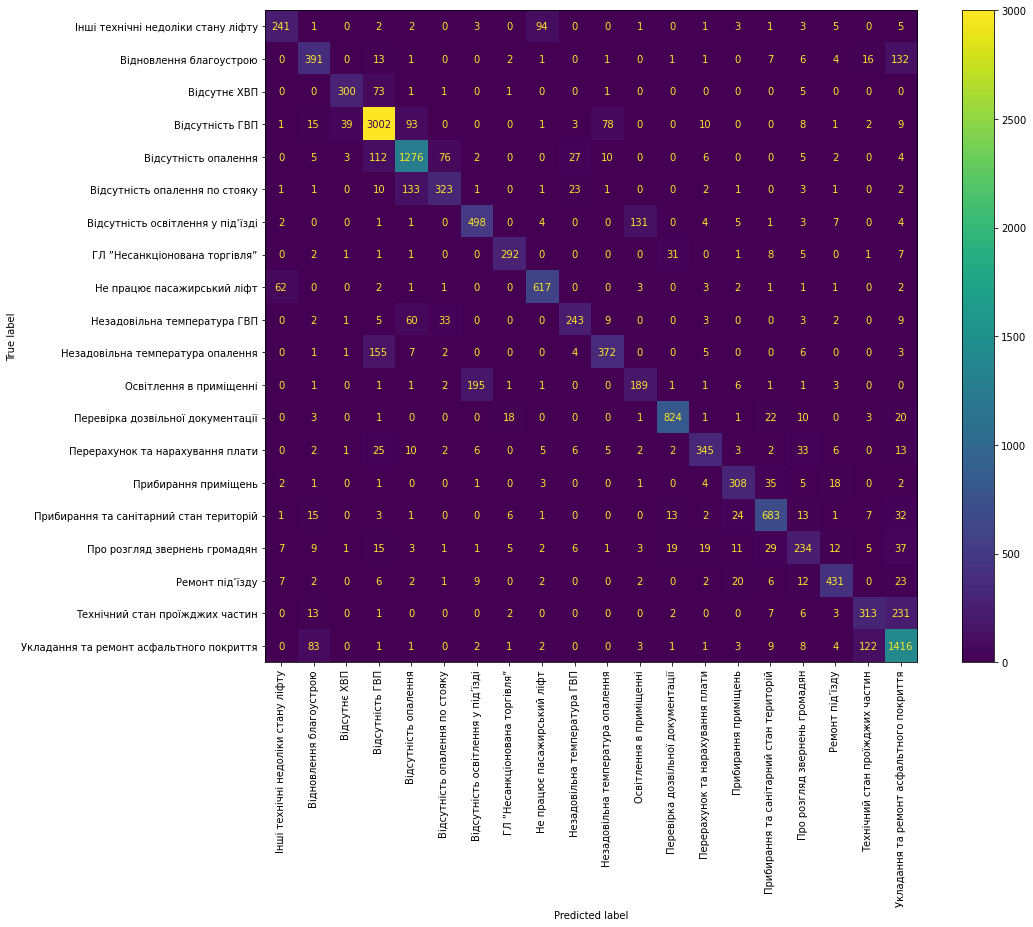

In [52]:
visualize_confusion_matrix(log_r, X_test_counts, y_test_1)

## BoW (based on Embedding Bag) + kNN

### Preparing text averaged vectors, based on Glove words embeddings

In [28]:
import numpy as np

def load_glove_model(path_to_model):
    print("Loading Glove Model")
    glove_model = {}
    
    with open(path_to_model, 'r', encoding = 'utf-8') as f:
        for line in tqdm(f):
            splitted = line.split()
            word = splitted[0]
            word_embedding = np.array([float(value) for value in splitted[1:]])
            glove_model[word] = word_embedding
        print(len(glove_model)," words loaded!")
    return glove_model

In [29]:
path_to_glove_emb = 'embeddings/fiction.cased.tokenized.glove.300d'
glove_model = load_glove_model(path_to_glove_emb)

Loading Glove Model



116804  words loaded!


In [30]:
glove_model['і'].shape

(300,)

In [31]:
def prepare_avg_text_emb(tokenized_text):
    all_words_emb = []
    
    for word in tokenized_text:
        if word not in glove_model:
            continue
        else:
            all_words_emb.append(glove_model[word])
            
    return np.mean(all_words_emb, axis=0)

In [32]:
filtered_data['averaged_glove_emb'] = filtered_data['tokenized_text'].map(lambda tokens: prepare_avg_text_emb(tokens))
filtered_data['averaged_glove_emb']

0        [-0.05900318918918919, -0.023955689189189194, ...
1        [-0.13185752941176468, 0.12208076470588235, 0....
2        [-0.040705874999999996, 0.06640112499999998, 0...
3        [-0.529612, -0.258674, 0.467173, -0.029673, -0...
4        [-0.08182458620689653, -0.09215286206896547, 0...
                               ...                        
61532    [-0.04352127272727272, -0.0640359090909091, 0....
61533    [-0.06189014018691589, -0.0012295327102803792,...
61534    [-0.10588334615384615, 0.011245076923076922, 0...
61535    [-0.022282769230769224, 0.1263565384615385, -0...
61536    [-0.06692574683544304, 0.015808886075949376, -...
Name: averaged_glove_emb, Length: 61537, dtype: object

In [33]:
type(filtered_data['averaged_glove_emb'][0])

numpy.ndarray

In [34]:
len(filtered_data['averaged_glove_emb'][0])

300

In [35]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61537 entries, 0 to 61536
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   StatusTitle         61537 non-null  object
 1   CallZCdate          61536 non-null  object
 2   CallZReply          61537 non-null  object
 3   CallZText           61537 non-null  object
 4   CallZManager        61537 non-null  object
 5   CallZType           61537 non-null  object
 6   CallDate            61537 non-null  object
 7   CallCode            61537 non-null  object
 8   FbId                61537 non-null  object
 9   Enabled             61537 non-null  object
 10  PublicAgree         61537 non-null  object
 11  CallZStatusId       61537 non-null  object
 12  CallId              61537 non-null  object
 13  SyncTime            61537 non-null  object
 14  PX                  61537 non-null  object
 15  PY                  61537 non-null  object
 16  showStatus          61

In [36]:
filtered_data['averaged_glove_emb'].shape

(61537,)

In [37]:
filtered_data_glove = filtered_data[filtered_data['averaged_glove_emb'].notna()]
filtered_data_glove['averaged_glove_emb'].shape

(61161,)

In [38]:
filtered_data_tmp = pd.DataFrame(filtered_data_glove['averaged_glove_emb'].to_list(), 
                                 columns=[f'{i + 1}' for i in range(300)])
filtered_data_tmp

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,-0.059003,-0.023956,-0.061910,0.035245,-0.358607,0.038332,0.163380,0.041859,-0.053857,-0.181600,...,0.162131,0.106944,-0.065121,-0.047514,0.209834,-0.013272,0.084619,-0.042062,-0.087536,-0.035473
1,-0.131858,0.122081,0.182709,-0.007877,-1.086764,0.096187,0.097857,0.062512,-0.107504,0.046074,...,0.108117,0.113386,0.082225,0.053156,0.050790,-0.086905,0.080521,0.021509,-0.052710,-0.128688
2,-0.040706,0.066401,0.055226,0.062941,-0.211029,-0.058707,0.104616,0.178545,0.063152,-0.198533,...,0.051386,0.092332,0.041056,-0.095029,0.232001,-0.044772,-0.138236,-0.112797,-0.004522,0.054414
3,-0.529612,-0.258674,0.467173,-0.029673,-0.392262,-0.101142,0.280910,-0.077040,-0.249168,0.099919,...,0.293667,-0.184720,-0.237406,0.379631,-0.423618,-0.230698,-0.178933,0.037166,-0.714900,0.166240
4,-0.081825,-0.092153,0.077187,-0.030829,-0.343569,-0.026215,0.141987,0.043996,0.028387,-0.082674,...,0.137769,0.198651,-0.204819,-0.075900,-0.028886,-0.032048,0.142709,-0.071296,-0.140723,0.050530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61156,-0.043521,-0.064036,0.044492,-0.026672,-0.431137,0.025509,0.169981,0.082469,-0.018296,-0.121443,...,0.201256,0.272631,-0.136760,-0.125138,0.002461,-0.028177,0.219108,-0.156403,-0.190525,-0.000300
61157,-0.061890,-0.001230,0.043783,0.050357,-0.383688,-0.038707,0.051935,0.073540,-0.017746,-0.034069,...,0.121159,0.071845,-0.077364,-0.023380,-0.049872,0.059342,0.031313,-0.105172,-0.094544,-0.059749
61158,-0.105883,0.011245,0.009769,0.042730,-0.473124,0.018039,0.063010,-0.043309,0.082939,-0.071425,...,0.043846,0.133926,-0.025252,-0.075106,-0.009828,-0.024710,0.072806,-0.185609,-0.115019,-0.012086
61159,-0.022283,0.126357,-0.093875,0.053814,-0.439915,0.089805,0.251602,0.055312,0.009989,-0.083647,...,0.347572,0.224712,-0.071917,0.019324,0.296410,-0.018413,0.011506,-0.213399,-0.100703,-0.030814


### K-Nearest Neighbours

In [39]:
X_2 = filtered_data_tmp
y_2 = filtered_data_glove['CallZType']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=test_size, random_state=random_seed)
X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape

((45870, 300), (45870,), (15291, 300), (15291,))

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
knn.fit(X_train_2, y_train_2)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [61]:
knn_preds = knn.predict(X_test_2)
knn_preds.shape

(15291,)

In [62]:
evaluate_model(y_test_2, knn_preds)

Accuracy:  0.39755411680073244
Precision: 0.3608098786803956
Recall:    0.2885376122010278
F1 score:  0.30402369887348124


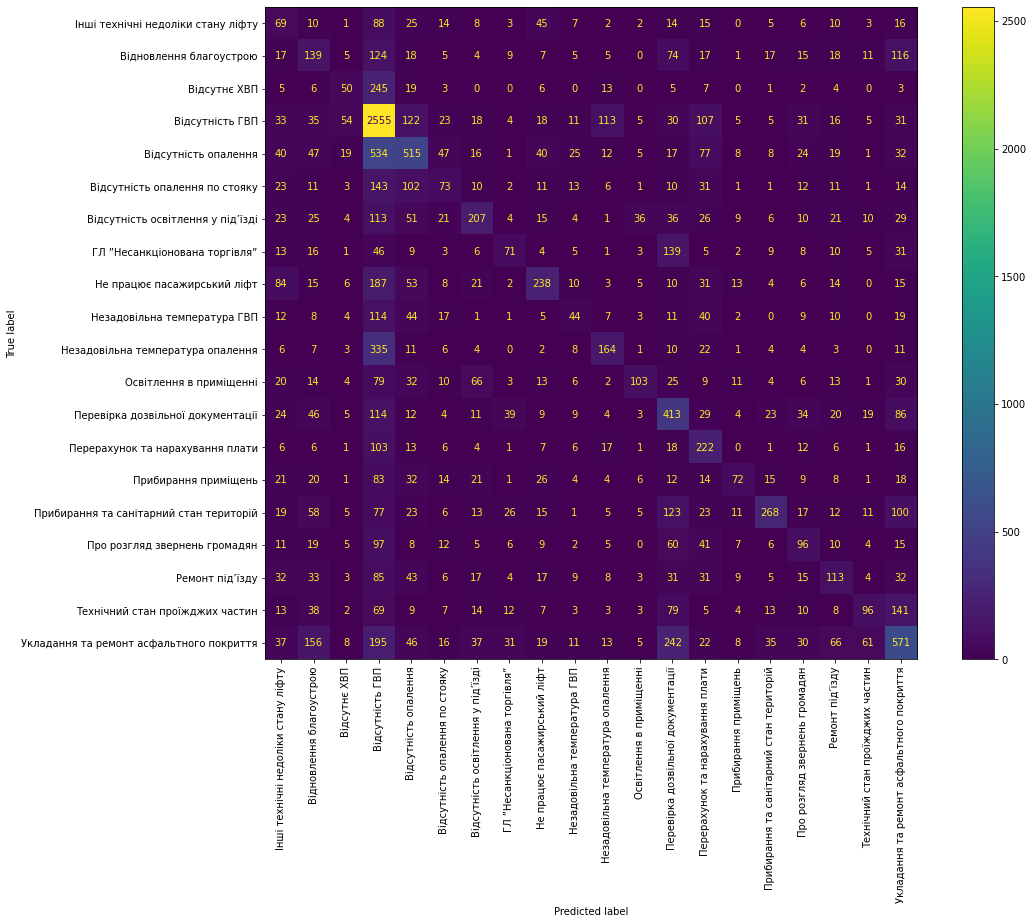

In [63]:
visualize_confusion_matrix(knn, X_test_2, y_test_2)

## Improving input tokens

In [64]:
def bow_count_method(filtered_data, X_column_name):
    X_cleaned = filtered_data[X_column_name]
    y_cleaned = filtered_data['CallZType']

    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cleaned, y_cleaned, test_size=test_size, 
                                                        random_state=random_seed)

    count_vectorizer = CountVectorizer()
    X_train_counts = count_vectorizer.fit_transform(X_train_1)
    X_test_counts = count_vectorizer.transform(X_test_1)

    log_r = LogisticRegression(n_jobs=-1, verbose=2, random_state=random_seed)
    log_r.fit(X_train_counts, y_train_1)
    log_r_preds = log_r.predict(X_test_counts)
    
    return log_r, log_r_preds, X_test_counts

In [76]:
def bow_glove_embedding_method(filtered_data, input_column_name):
    filtered_data['averaged_glove_emb'] = filtered_data[input_column_name].map(lambda tokens: 
                                                                               prepare_avg_text_emb(tokens))
    filtered_data_glove = filtered_data[filtered_data['averaged_glove_emb'].notna()]
    filtered_data_tmp = pd.DataFrame(filtered_data_glove['averaged_glove_emb'].to_list(), 
                                     columns=[f'{i + 1}' for i in range(300)])
    
    X_2 = filtered_data_tmp
    y_2 = filtered_data_glove['CallZType']

    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, 
                                                                test_size=test_size, random_state=random_seed)

    knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
    knn.fit(X_train_2, y_train_2)
    knn_preds = knn.predict(X_test_2)
    
    return knn, knn_preds, X_test_2, y_test_2

### Stopwords removal

In [65]:
import requests

link_to_stopwords = "https://raw.githubusercontent.com/skupriienko/Ukrainian-Stopwords/master/stopwords_ua_list.txt"

response = requests.get(link_to_stopwords)
stopwords = response.text.split()
stopwords = [stopword.replace(',', '').rstrip() for stopword in stopwords]
stopwords[-10:]

['якоїсь',
 'якому',
 'якомусь',
 'якось',
 'якою',
 'якоюсь',
 'якраз',
 'яку',
 'якусь',
 'якщо']

In [66]:
filtered_data['with_stopwords'] = filtered_data['cleaned_text'].apply(lambda s: ' '.join([word for word in s.split() 
                                                                                          if word not in stopwords]))

#### Testing BoW 1 (with CountVectorizer)

In [67]:
filtered_data['with_stopwords']

0        плановое отключение горячей воды должно было з...
1        17 01 2014р відсутне опалення 20 01 2014 пана ...
2        спасение города нужно начинать ценра неужели д...
3                           відсутнє гаряче водопостачання
4        отремонтируйте пожалуйста лифт доме ул приречн...
                               ...                        
61532    прошу срочно принять меры восстановлению работ...
61533    вимагаю вирішити питання несанкціонованої торг...
61534    тижня утворилася яма дорозі будинком бойлерної...
61535    добрый день свет возле подъезда появился сколь...
61536    лифт работает стабильно смотря периодические с...
Name: with_stopwords, Length: 61537, dtype: object

In [68]:
log_r, log_r_preds, X_test_counts = bow_count_method(filtered_data, "with_stopwords")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   45.9s finished


In [69]:
evaluate_model(y_test_1, log_r_preds)

Accuracy:  0.8037699057523562
Precision: 0.7851541784832583
Recall:    0.7478479801095526
F1 score:  0.7639557424771206


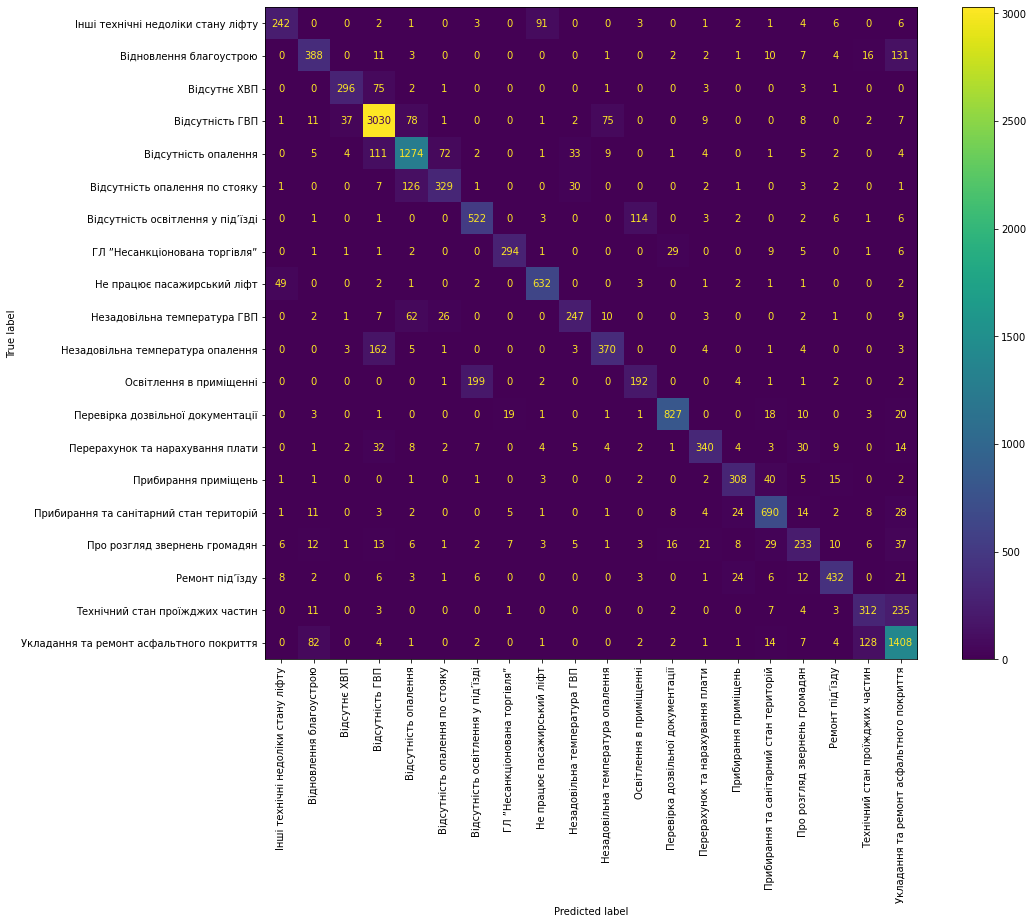

In [70]:
visualize_confusion_matrix(log_r, X_test_counts, y_test_1)

#### Testing BoW 2 (with Averaged Glove words embeddings)

In [73]:
filtered_data['tokenized_with_stopwords'] = filtered_data['with_stopwords'].apply(lambda text: tokenize_words(text))
filtered_data['tokenized_with_stopwords']

0        [плановое, отключение, горячей, воды, должно, ...
1        [17, 01, 2014, р, відсутне, опалення, 20, 01, ...
2        [спасение, города, нужно, начинать, ценра, неу...
3                       [відсутнє, гаряче, водопостачання]
4        [отремонтируйте, пожалуйста, лифт, доме, ул, п...
                               ...                        
61532    [прошу, срочно, принять, меры, восстановлению,...
61533    [вимагаю, вирішити, питання, несанкціонованої,...
61534    [тижня, утворилася, яма, дорозі, будинком, бой...
61535    [добрый, день, свет, возле, подъезда, появился...
61536    [лифт, работает, стабильно, смотря, периодичес...
Name: tokenized_with_stopwords, Length: 61537, dtype: object

In [77]:
knn, knn_preds, X_test_2, y_test_2 = bow_glove_embedding_method(filtered_data, 'tokenized_with_stopwords')

In [78]:
evaluate_model(y_test_2, knn_preds)

Accuracy:  0.4503711489193983
Precision: 0.4065729579706067
Recall:    0.329620507561395
F1 score:  0.34905140657350403


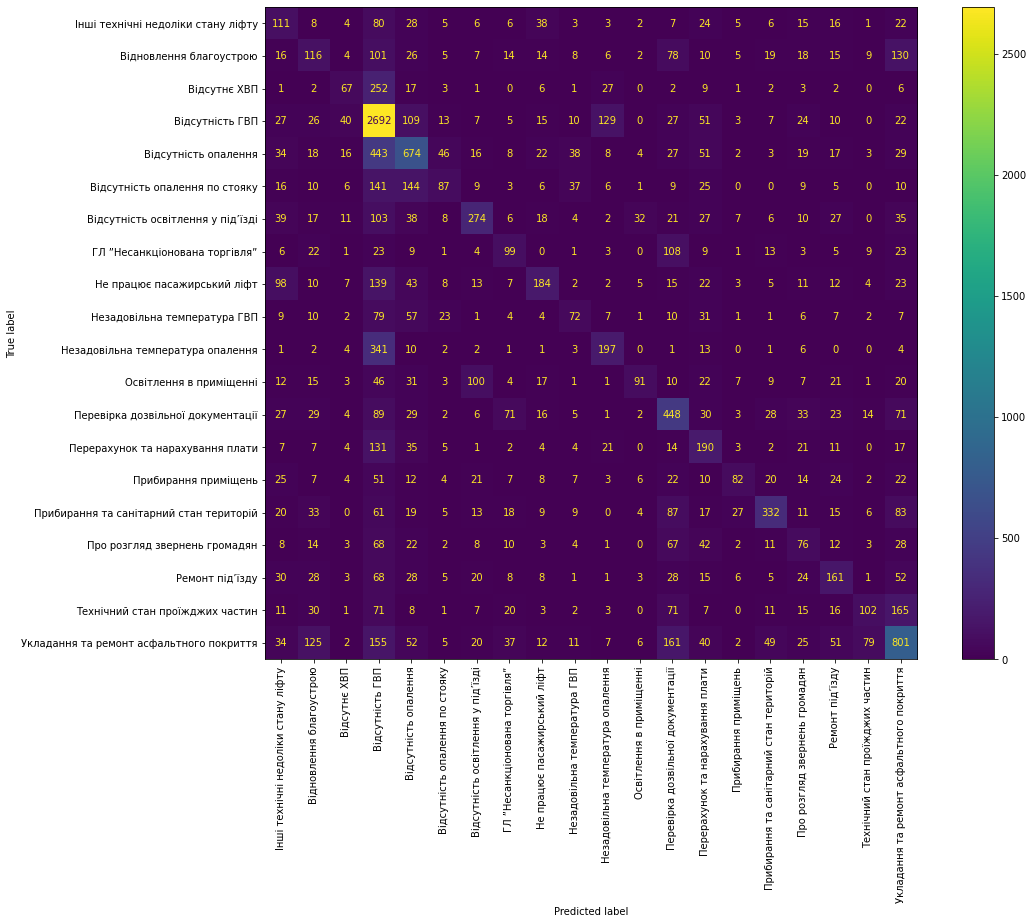

In [79]:
visualize_confusion_matrix(knn, X_test_2, y_test_2)

## Alternative classification models + ensembles

### SVM

#### Testing BoW 1 (with CountVectorizer)

In [81]:
from sklearn.svm import SVC

X_cleaned = filtered_data["cleaned_text"]
y_cleaned = filtered_data['CallZType']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cleaned, y_cleaned, test_size=test_size, 
                                                    random_state=random_seed)

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train_1)
X_test_counts = count_vectorizer.transform(X_test_1)

svm = SVC(verbose=2, random_state=random_seed)
svm.fit(X_train_counts, y_train_1)
svm_preds = svm.predict(X_test_counts)

[LibSVM]

In [82]:
evaluate_model(y_test_1, svm_preds)

Accuracy:  0.752811179720507
Precision: 0.7925662388682855
Recall:    0.6503384796952278
F1 score:  0.686747466344906


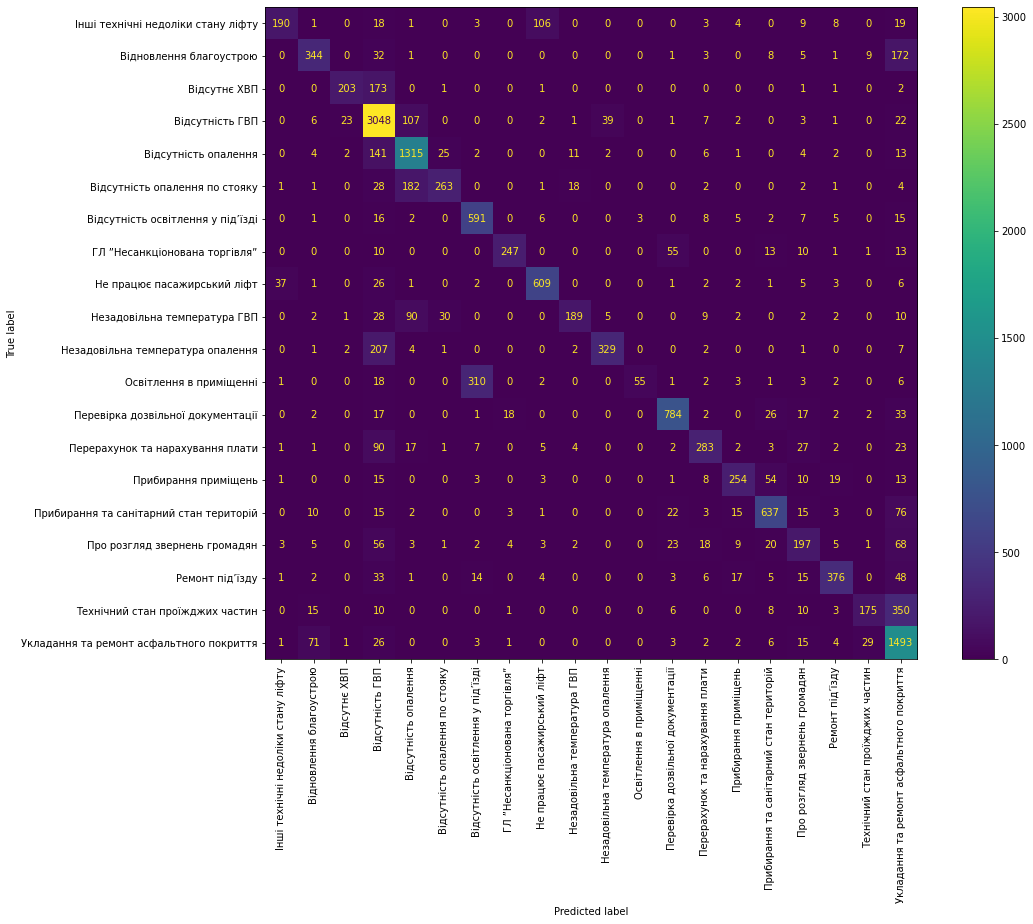

In [83]:
visualize_confusion_matrix(svm, X_test_counts, y_test_1)

#### Testing BoW 2 (with Averaged Glove words embeddings)

In [85]:
filtered_data['averaged_glove_emb'] = filtered_data["tokenized_text"].map(lambda tokens: 
                                                                     prepare_avg_text_emb(tokens))
filtered_data_glove = filtered_data[filtered_data['averaged_glove_emb'].notna()]
filtered_data_tmp = pd.DataFrame(filtered_data_glove['averaged_glove_emb'].to_list(), 
                                 columns=[f'{i + 1}' for i in range(300)])

X_2 = filtered_data_tmp
y_2 = filtered_data_glove['CallZType']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, 
                                                            test_size=test_size, random_state=random_seed)

svm = SVC(verbose=2, random_state=random_seed)
svm.fit(X_train_2, y_train_2)
svm_preds = svm.predict(X_test_2)

[LibSVM]

In [86]:
evaluate_model(y_test_2, svm_preds)

Accuracy:  0.5324700804394742
Precision: 0.5997947744228745
Recall:    0.36574810552615594
F1 score:  0.38355948553551666


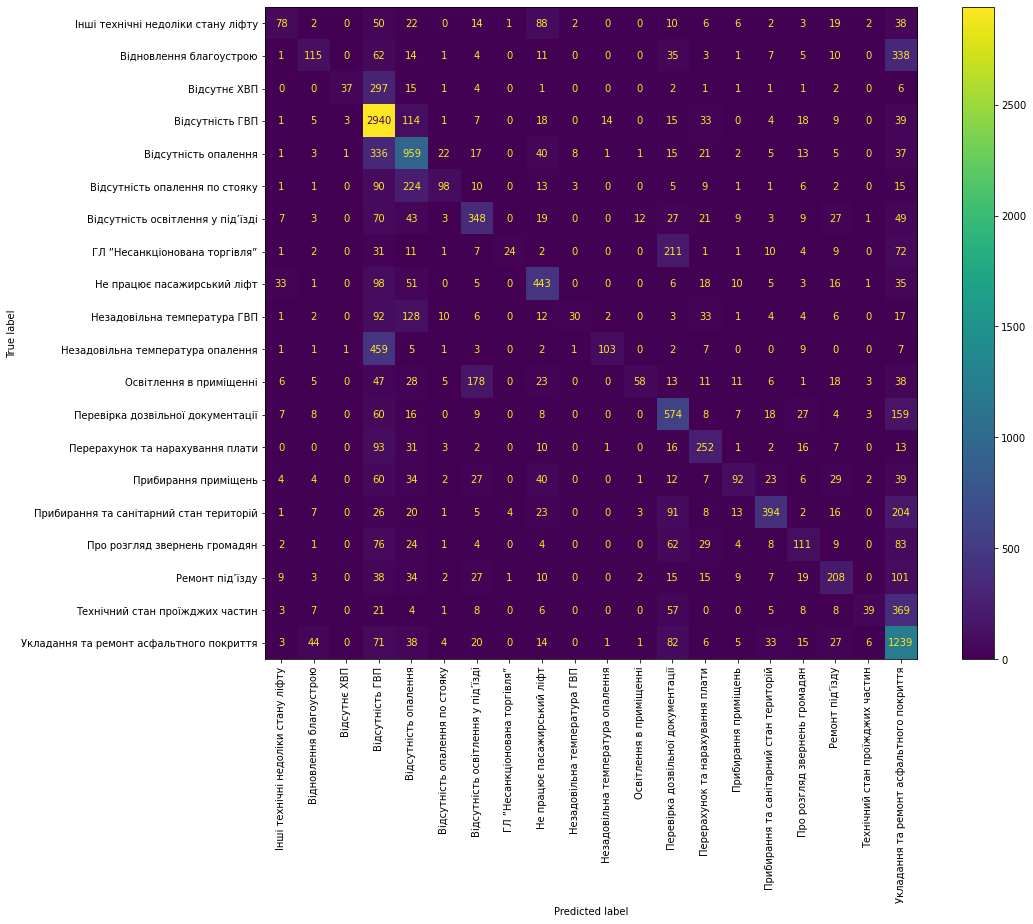

In [87]:
visualize_confusion_matrix(svm, X_test_2, y_test_2)

### Decision Tree

#### Testing BoW 1 (with CountVectorizer)

In [89]:
from sklearn.tree import DecisionTreeClassifier

X_cleaned = filtered_data["cleaned_text"]
y_cleaned = filtered_data['CallZType']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cleaned, y_cleaned, test_size=test_size, 
                                                    random_state=random_seed)

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train_1)
X_test_counts = count_vectorizer.transform(X_test_1)

decision_tree = DecisionTreeClassifier(random_state=random_seed)
decision_tree.fit(X_train_counts, y_train_1)
decision_tree_preds = decision_tree.predict(X_test_counts)

In [90]:
evaluate_model(y_test_1, decision_tree_preds)

Accuracy:  0.6921026974325641
Precision: 0.6343244359110709
Recall:    0.626927397562176
F1 score:  0.6297825993868333


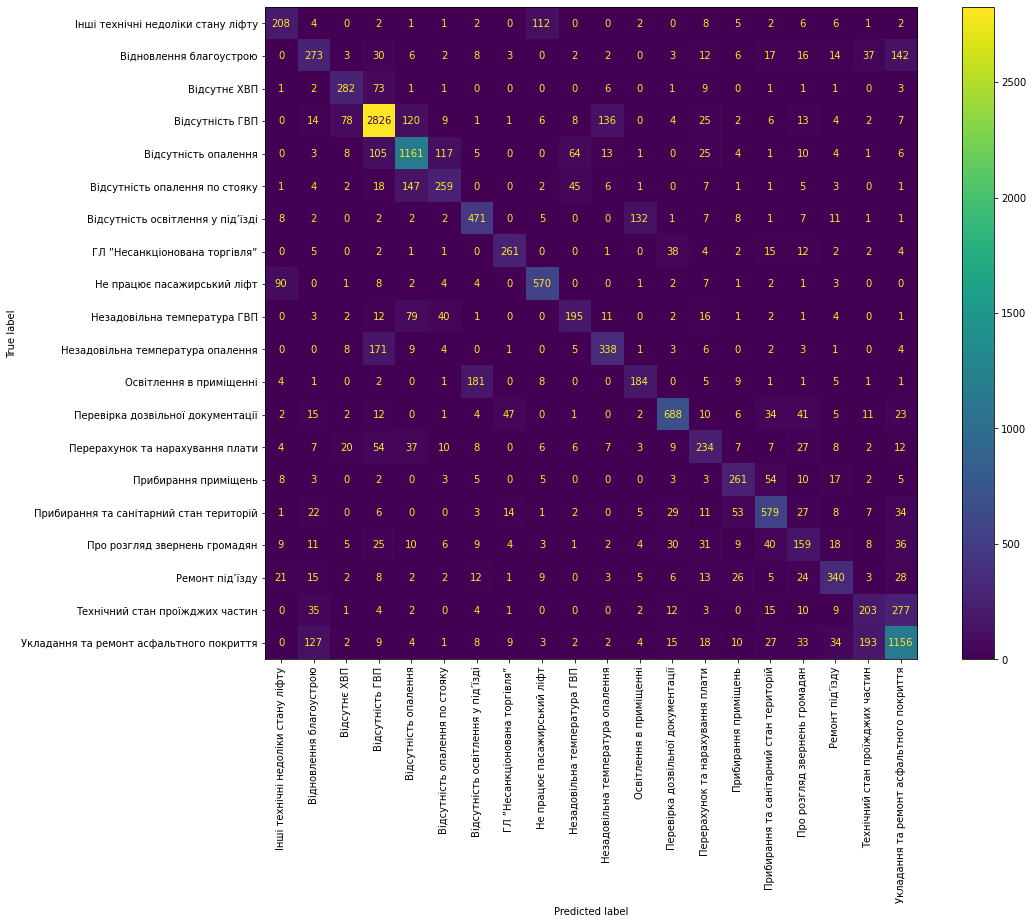

In [91]:
visualize_confusion_matrix(decision_tree, X_test_counts, y_test_1)

#### Testing BoW 2 (with Averaged Glove words embeddings)

In [92]:
filtered_data['averaged_glove_emb'] = filtered_data["tokenized_text"].map(lambda tokens: 
                                                                     prepare_avg_text_emb(tokens))
filtered_data_glove = filtered_data[filtered_data['averaged_glove_emb'].notna()]
filtered_data_tmp = pd.DataFrame(filtered_data_glove['averaged_glove_emb'].to_list(), 
                                 columns=[f'{i + 1}' for i in range(300)])

X_2 = filtered_data_tmp
y_2 = filtered_data_glove['CallZType']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, 
                                                            test_size=test_size, random_state=random_seed)

decision_tree = DecisionTreeClassifier(random_state=random_seed)
decision_tree.fit(X_train_2, y_train_2)
decision_tree_preds = decision_tree.predict(X_test_2)

In [93]:
evaluate_model(y_test_2, decision_tree_preds)

Accuracy:  0.334379700477405
Precision: 0.27215059347513615
Recall:    0.2726895415160275
F1 score:  0.272048706899206


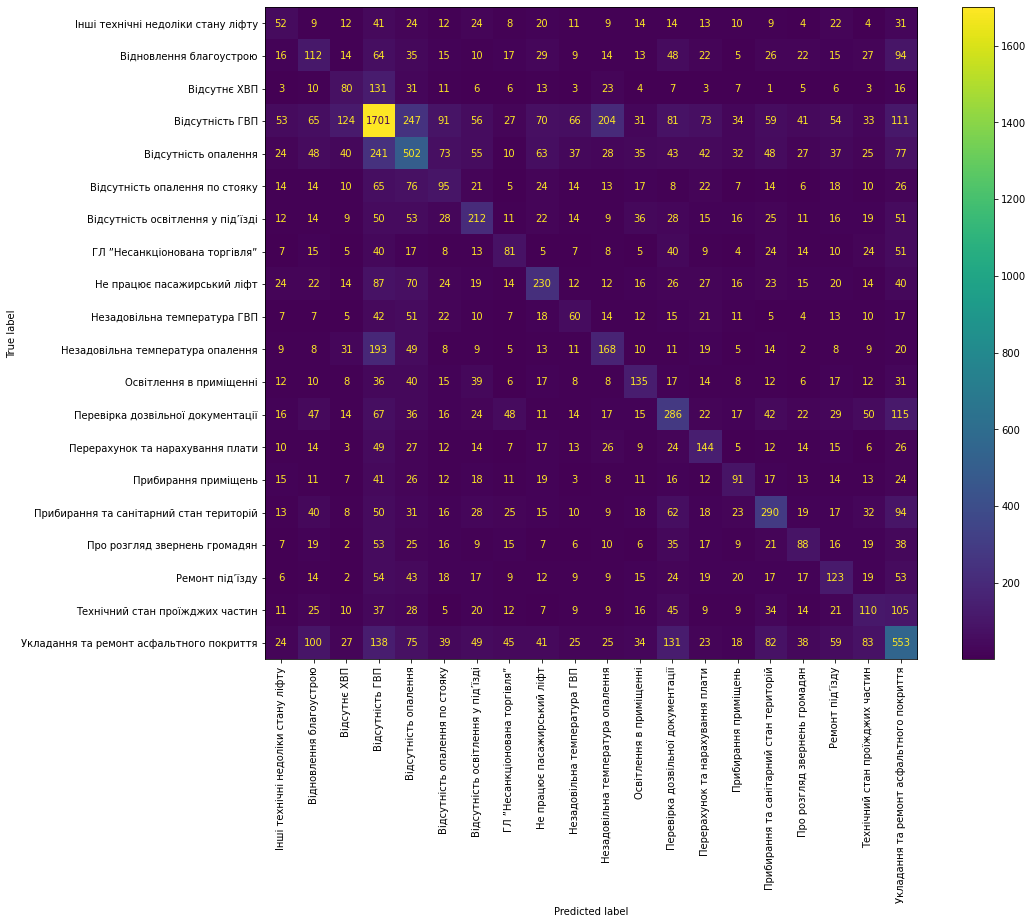

In [94]:
visualize_confusion_matrix(decision_tree, X_test_2, y_test_2)

### Ensemble (Random Forest)

#### Testing BoW 1 (with CountVectorizer)

In [96]:
from sklearn.ensemble import RandomForestClassifier

X_cleaned = filtered_data["cleaned_text"]
y_cleaned = filtered_data['CallZType']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_cleaned, y_cleaned, test_size=test_size, 
                                                    random_state=random_seed)

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train_1)
X_test_counts = count_vectorizer.transform(X_test_1)

rf = RandomForestClassifier(verbose=0, n_jobs=-1, random_state=random_seed)
rf.fit(X_train_counts, y_train_1)
rf_preds = rf.predict(X_test_counts)

In [97]:
evaluate_model(y_test_1, rf_preds)

Accuracy:  0.7316867078323042
Precision: 0.8038578799112109
Recall:    0.6012600628522449
F1 score:  0.6447835338063398


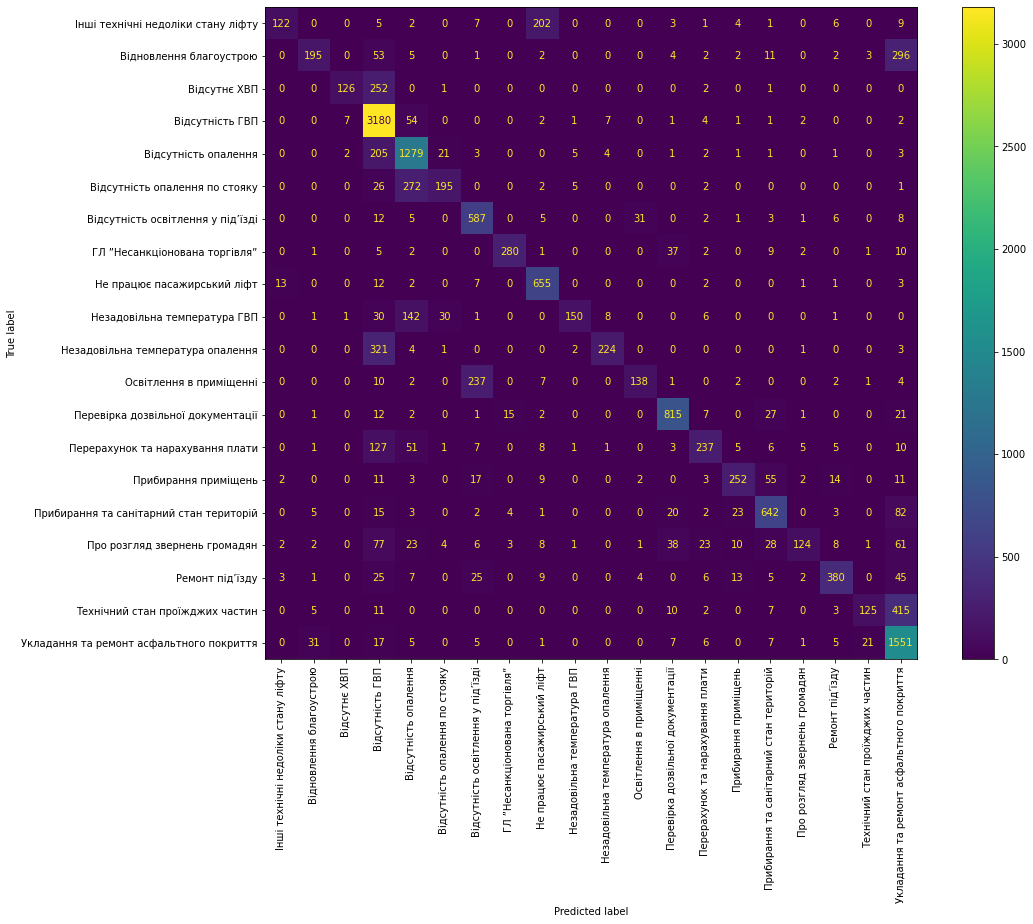

In [98]:
visualize_confusion_matrix(rf, X_test_counts, y_test_1)

#### Testing BoW 2 (with Averaged Glove words embeddings)

In [99]:
filtered_data['averaged_glove_emb'] = filtered_data["tokenized_text"].map(lambda tokens: 
                                                                     prepare_avg_text_emb(tokens))
filtered_data_glove = filtered_data[filtered_data['averaged_glove_emb'].notna()]
filtered_data_tmp = pd.DataFrame(filtered_data_glove['averaged_glove_emb'].to_list(), 
                                 columns=[f'{i + 1}' for i in range(300)])

X_2 = filtered_data_tmp
y_2 = filtered_data_glove['CallZType']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, 
                                                            test_size=test_size, random_state=random_seed)

rf = RandomForestClassifier(verbose=0, n_jobs=-1, random_state=random_seed)
rf.fit(X_train_2, y_train_2)
rf_preds = rf.predict(X_test_2)

In [100]:
evaluate_model(y_test_2, rf_preds)

Accuracy:  0.48355241645412333
Precision: 0.713583320930957
Recall:    0.3254896637302555
F1 score:  0.3873734168070264


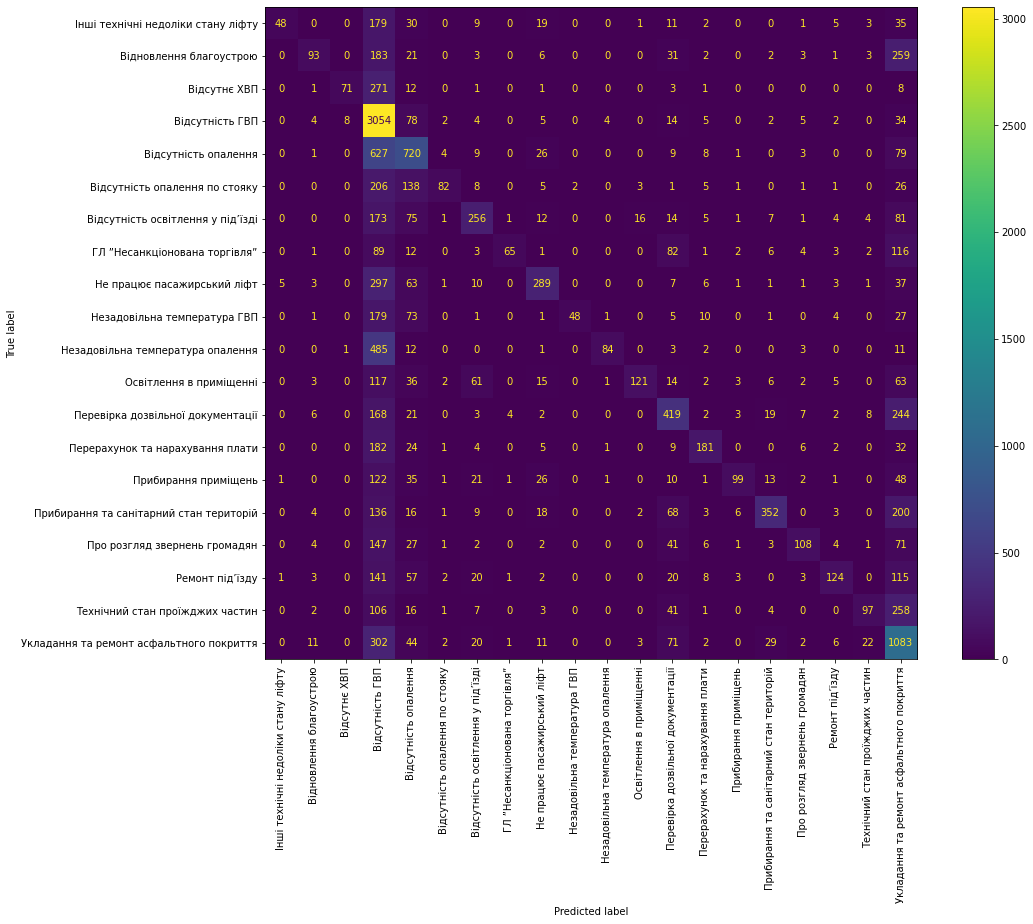

In [101]:
visualize_confusion_matrix(rf, X_test_2, y_test_2)

## Trying other pretrained word vectors

### Word2Vec

In [108]:
def load_word2vec_model(path_to_model):
    print("Loading Word2Vec Model")
    word2vec_model = {}
    
    counter = 0
    
    with open(path_to_model, 'r', encoding = 'utf-8') as f:
        for line in tqdm(f):
            counter += 1
            if counter == 1:
                continue
            else:
                splitted = line.split()
                word = splitted[0]
                word_embedding = np.array([float(value) for value in splitted[1:]])
                word2vec_model[word] = word_embedding
        print(len(word2vec_model)," words loaded!")
    return word2vec_model

In [109]:
path_to_word2vec_emb = 'embeddings/fiction.cased.tokenized.word2vec.300d'
word2vec_model = load_word2vec_model(path_to_word2vec_emb)

Loading Word2Vec Model



116803  words loaded!


In [110]:
def prepare_avg_text_embedding(tokenized_text, model):
    all_words_emb = []
    
    for word in tokenized_text:
        if word not in model:
            continue
        else:
            all_words_emb.append(model[word])
            
    return np.mean(all_words_emb, axis=0)

In [111]:
filtered_data['averaged_word2vec_emb'] = filtered_data['tokenized_text'].map(lambda tokens: 
                                                                             prepare_avg_text_embedding(tokens,
                                                                                                       word2vec_model))
filtered_data['averaged_word2vec_emb']

0        [-0.11592710810810813, 0.40346595945945946, 0....
1        [0.09662658823529412, -0.17362888235294113, 0....
2        [0.21078975, 0.22285337499999996, 0.3115805000...
3        [-0.204489, 0.534038, -0.262129, 0.620023, 1.1...
4        [-0.09133134482758619, 0.00671131034482761, 0....
                               ...                        
61532    [-0.09257227272727271, -0.004832757575757584, ...
61533    [0.010493813084112139, -0.04531426168224295, 0...
61534    [0.006013615384615386, -0.15021965384615382, -...
61535    [-0.15219815384615384, 0.15963746153846156, 0....
61536    [-0.20157832911392398, 0.3145242911392405, 0.5...
Name: averaged_word2vec_emb, Length: 61537, dtype: object

In [112]:
filtered_data_word2vec = filtered_data[filtered_data['averaged_word2vec_emb'].notna()]
filtered_data_word2vec['averaged_word2vec_emb'].shape

filtered_data_tmp = pd.DataFrame(filtered_data_word2vec['averaged_word2vec_emb'].to_list(), 
                                 columns=[f'{i + 1}' for i in range(300)])
filtered_data_tmp

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,-0.115927,0.403466,0.521149,-0.271016,0.022038,0.080059,0.385739,0.459441,0.102088,-0.130470,...,-0.302003,0.350129,-0.095777,-0.126944,0.057051,0.168933,-0.116701,0.024523,-0.379905,-0.420349
1,0.096627,-0.173629,0.412394,-0.266976,0.409332,0.193565,-0.041435,0.486750,-0.026780,-0.234695,...,-0.689453,-0.080856,-0.014569,0.070626,0.019132,-0.013291,-0.134155,-0.165604,0.208370,0.138945
2,0.210790,0.222853,0.311581,0.012069,-0.229528,0.317894,0.266664,0.362358,0.082217,0.103864,...,-0.302406,0.390598,0.141761,-0.175955,-0.190494,-0.154502,-0.085535,0.257044,-0.135710,-0.397264
3,-0.204489,0.534038,-0.262129,0.620023,1.158408,-0.518144,0.162321,0.206202,0.484233,-0.410129,...,0.566667,1.355817,0.342850,-0.652942,-0.304225,0.291716,-0.656370,0.617510,-0.348126,0.534104
4,-0.091331,0.006711,0.477874,-0.359573,0.049143,0.376513,0.067226,0.436119,-0.086412,-0.166576,...,-0.069900,0.194823,0.034138,0.013237,0.251502,0.055190,0.034045,0.043705,-0.146179,-0.341790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61156,-0.092572,-0.004833,0.548362,-0.405242,-0.082502,0.524336,-0.082927,0.566792,0.081019,-0.275026,...,-0.119611,0.135432,0.082448,0.103883,0.255308,0.296406,-0.068828,0.048207,-0.339631,-0.274722
61157,0.010494,-0.045314,0.020981,-0.334454,0.154790,0.372922,-0.079444,0.198277,-0.108876,-0.100734,...,-0.278759,-0.225433,0.121980,-0.176163,-0.030593,-0.151987,-0.001133,-0.045036,0.240062,-0.177841
61158,0.006014,-0.150220,-0.035268,-0.575826,0.123131,-0.039343,0.139572,0.078565,-0.128599,-0.088974,...,-0.104869,-0.354308,0.055716,-0.084443,-0.191678,-0.171864,-0.057805,0.177280,0.128188,-0.077682
61159,-0.152198,0.159637,0.455655,-0.261946,0.038484,0.301210,0.451678,0.673267,0.011701,0.185879,...,-0.249479,0.169771,0.167058,0.153834,-0.108414,-0.024391,-0.293097,-0.178997,-0.224519,-0.280959


#### Testing BoW 2 (KNN with Averaged Word2Vec words embeddings)

In [113]:
X_2 = filtered_data_tmp
y_2 = filtered_data_glove['CallZType']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, 
                                                            test_size=test_size, random_state=random_seed)

knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
knn.fit(X_train_2, y_train_2)
knn_preds = knn.predict(X_test_2)

In [114]:
evaluate_model(y_test_2, knn_preds)

Accuracy:  0.3902295467922307
Precision: 0.34646748449807274
Recall:    0.2826021399405527
F1 score:  0.29817702642794697


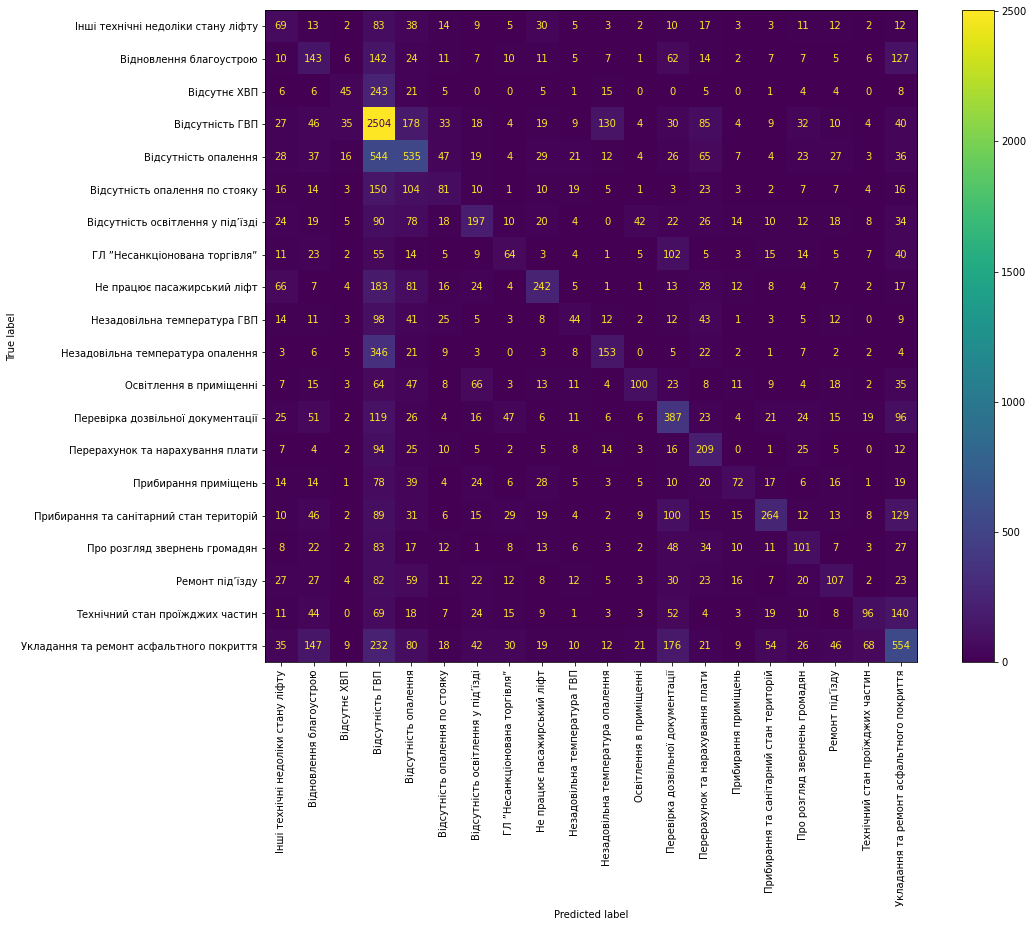

In [115]:
visualize_confusion_matrix(knn, X_test_2, y_test_2)

### LexVec

In [116]:
def load_lexvec_model(path_to_model):
    print("Loading LexVec Model")
    lexvec_model = {}
    
    counter = 0
    
    with open(path_to_model, 'r', encoding = 'utf-8') as f:
        for line in tqdm(f):
            counter += 1
            if counter == 1:
                continue
            else:
                splitted = line.split()
                word = splitted[0]
                word_embedding = np.array([float(value) for value in splitted[1:]])
                lexvec_model[word] = word_embedding
        print(len(lexvec_model)," words loaded!")
    return lexvec_model

In [117]:
path_to_lexvec_emb = 'embeddings/fiction.cased.tokenized.lexvec.300d'
lexvec_model = load_lexvec_model(path_to_lexvec_emb)

Loading LexVec Model



116804  words loaded!


In [118]:
filtered_data['averaged_lexvec_emb'] = filtered_data['tokenized_text'].map(lambda tokens: 
                                                                           prepare_avg_text_embedding(tokens,
                                                                                                      lexvec_model))
filtered_data['averaged_lexvec_emb']

0        [0.04923018918918917, 0.12993851351351351, 0.1...
1        [-0.05757964705882352, 0.005076882352941172, 0...
2        [0.091418375, 0.02071512499999999, 0.218316625...
3        [0.016154, 0.051735, -0.266789, 0.199207, 0.02...
4        [-0.04809827586206897, 0.05558179310344826, 0....
                               ...                        
61532    [-0.0020409090909090854, 0.034257636363636344,...
61533    [-0.05897212149532711, -0.04690728037383181, 0...
61534    [-0.041319538461538456, 0.015376961538461522, ...
61535    [-0.06470576923076923, 0.11527046153846153, 0....
61536    [0.02139377215189873, 0.10143482278481013, 0.1...
Name: averaged_lexvec_emb, Length: 61537, dtype: object

In [119]:
filtered_data_lexvec = filtered_data[filtered_data['averaged_lexvec_emb'].notna()]
filtered_data_lexvec['averaged_lexvec_emb'].shape

filtered_data_tmp = pd.DataFrame(filtered_data_lexvec['averaged_lexvec_emb'].to_list(), 
                                 columns=[f'{i + 1}' for i in range(300)])
filtered_data_tmp

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,0.049230,0.129939,0.133911,-0.077899,0.008945,0.044134,0.141946,0.163973,-0.023970,0.017888,...,0.042768,0.004948,-0.111674,-0.125799,-0.152882,0.125276,0.038599,-0.086028,-0.038881,-0.047752
1,-0.057580,0.005077,0.140781,-0.033911,-0.020728,-0.005491,-0.022224,-0.010348,-0.009211,0.044125,...,0.134289,0.031873,-0.030536,0.036757,0.065311,0.189121,-0.063670,-0.100173,-0.068258,-0.108667
2,0.091418,0.020715,0.218317,-0.146533,-0.049055,-0.010866,0.281097,0.080520,-0.051909,-0.000388,...,0.014157,0.027174,-0.172834,-0.088150,-0.197915,0.133701,0.047957,0.006531,0.036225,-0.061321
3,0.016154,0.051735,-0.266789,0.199207,0.028065,-0.010199,0.186095,0.015888,-0.341096,0.375514,...,0.243350,0.267291,-0.168951,0.014193,-0.094027,0.419535,0.095544,0.084562,0.051685,0.266494
4,-0.048098,0.055582,0.154923,-0.072538,0.042443,-0.014117,0.130823,0.153408,0.081280,0.049051,...,0.087599,0.084421,-0.062710,-0.036384,-0.079137,0.076267,-0.024610,-0.026434,-0.010119,-0.044292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61156,-0.002041,0.034258,0.076927,-0.128759,0.076477,0.053100,0.180245,0.212525,-0.053715,0.010059,...,-0.000578,0.067115,-0.132157,-0.068611,-0.147212,0.114995,0.028205,-0.112436,-0.003214,-0.050898
61157,-0.058972,-0.046907,0.067923,0.022673,0.026830,0.064037,-0.046243,-0.043729,-0.033256,0.026335,...,0.088490,0.098422,-0.002427,0.122082,0.015078,0.069239,-0.010266,-0.045883,0.032179,-0.058831
61158,-0.041320,0.015377,0.008208,0.079703,-0.107518,0.052627,-0.032476,-0.074589,-0.014563,0.006365,...,0.172772,0.143584,0.024131,0.046885,0.044704,0.110913,0.018537,0.059222,-0.038543,-0.071951
61159,-0.064706,0.115270,0.095749,-0.101964,0.010511,-0.063619,0.169202,0.180164,-0.075355,-0.042841,...,-0.065253,0.026401,-0.177194,-0.066773,-0.187892,0.175753,0.084961,-0.126440,-0.083128,0.027114


#### Testing BoW 2 (KNN with Averaged LexVec words embeddings)

In [121]:
X_2 = filtered_data_tmp
y_2 = filtered_data_glove['CallZType']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, 
                                                            test_size=test_size, random_state=random_seed)

knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
knn.fit(X_train_2, y_train_2)
knn_preds = knn.predict(X_test_2)

In [122]:
evaluate_model(y_test_2, knn_preds)

Accuracy:  0.5125237067556079
Precision: 0.5142388791602969
Recall:    0.40091482086145935
F1 score:  0.42768191513115433


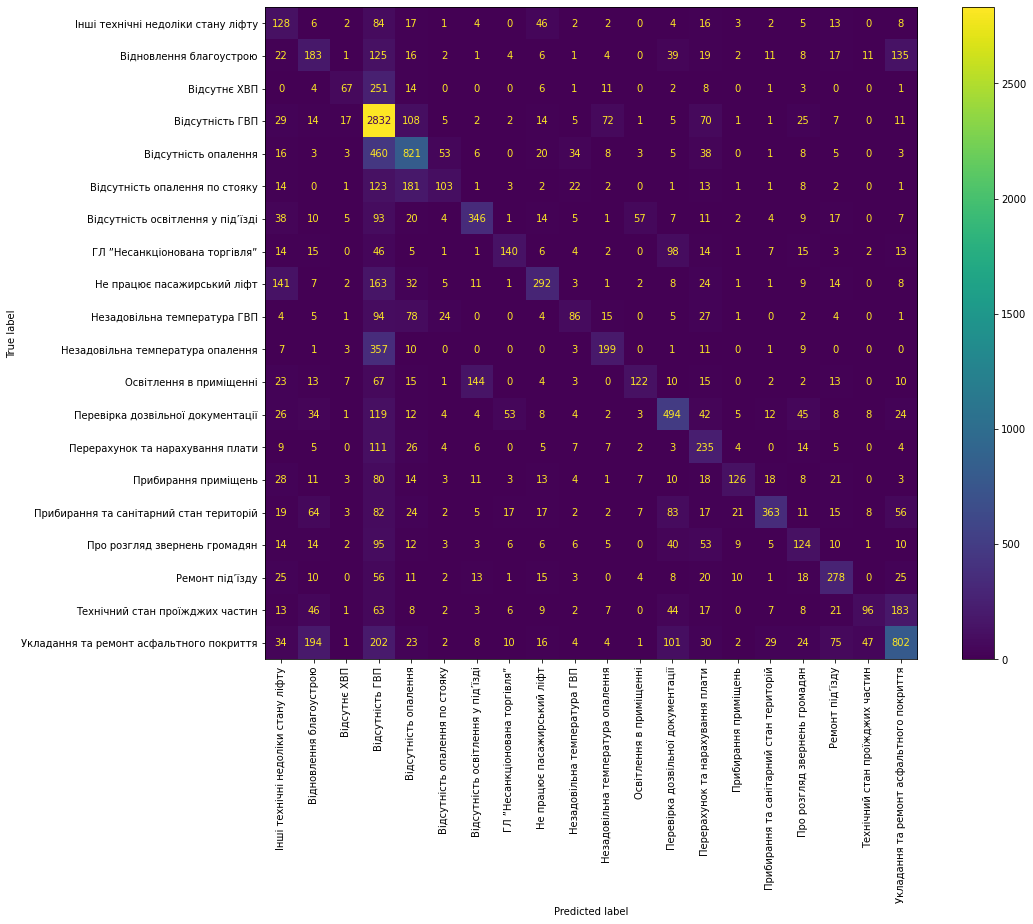

In [123]:
visualize_confusion_matrix(knn, X_test_2, y_test_2)

# Additional tasks

## doc2vec

In [174]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

8

In [178]:
filtered_data[['tokenized_text', 'CallZType']]

,tokenized_text,CallZType
0,"[плановое, отключение, горячей, воды, должно, ...",Відсутність ГВП
1,"[з, 17, 01, 2014, р, відсутне, опалення, 20, 0...",Відсутність опалення
2,"[спасение, города, нужно, начинать, с, ценра, ...",Перевірка дозвільної документації
3,"[відсутнє, гаряче, водопостачання]",Відсутність ГВП
4,"[отремонтируйте, пожалуйста, лифт, в, доме, по...",Інші технічні недоліки стану ліфту
...,...,...
61532,"[прошу, срочно, принять, меры, к, восстановлен...",Не працює пасажирський ліфт
61533,"[вимагаю, вирішити, питання, щодо, несанкціоно...",ГЛ ”Несанкціонована торгівля”
61534,"[близько, тижня, тому, утворилася, яма, на, до...",Укладання та ремонт асфальтного покриття
61535,"[добрый, день, свет, возле, подъезда, у, нас, ...",Відсутність освітлення у під’їзді


In [179]:
X_doc2vec = filtered_data["tokenized_text"]
y_doc2vec = filtered_data['CallZType']

X_train_doc2vec, X_test_doc2vec, y_train_doc2vec, y_test_doc2vec = train_test_split(X_doc2vec, 
                                                                                    y_doc2vec, 
                                                                                    test_size=test_size, 
                                                                                    random_state=random_seed)
X_train_doc2vec.shape, X_test_doc2vec.shape, y_train_doc2vec.shape, y_test_doc2vec.shape

((46152,), (15385,), (46152,), (15385,))

In [189]:
X_train_doc2vec

46393    [навпроти, будинку, за, адресою, миколи, лебед...
41681    [тампере, 8, покрытие, придомовой, территории,...
48915    [здравствуйте, по, данному, адресу, ул, стальс...
44800    [коли, цих, бізнесменів, виженуть, з, парку, н...
27154    [доброго, дня, ділянка, внутрішньоквартального...
                               ...                        
54343    [з, середи, 20, 11, 2013, р, відсутнє, опаленн...
38158    [доброго, времени, суток, помогите, разобратьс...
860      [с, 28, ноября, отсутствует, отопление, во, вс...
15795    [станом, на, 13, 00, 13, 11, 2013, відсутнє, о...
56422    [повторне, звернення, на, своє, перше, звернен...
Name: tokenized_text, Length: 46152, dtype: object

In [220]:
from gensim.models.doc2vec import TaggedDocument

tagged_train_data = [TaggedDocument(words=X_train_doc2vec.iloc[i], tags=[y_train_doc2vec.iloc[i]]) 
                     for i in tqdm(range(len(X_train_doc2vec)))]

In [209]:
tagged_test_data = [TaggedDocument(words=X_test_doc2vec.iloc[i], tags=[y_test_doc2vec.iloc[i]]) 
                    for i in tqdm(range(len(X_test_doc2vec)))]
len(tagged_test_data)

15385

In [210]:
from gensim.models.doc2vec import Doc2Vec
from sklearn import utils

# dm=0 in Dov2Vec parameters means that we are using distributed bag of words (DBOW)
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab(tagged_train_data)

In [212]:
%%time
for epoch in tqdm(range(30), position=0):
    model_dbow.train(utils.shuffle(tagged_train_data), total_examples=len(tagged_train_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha


Wall time: 1min 24s


In [215]:
def vec_for_learning(model, tagged_docs):
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in tagged_docs])
    return targets, regressors

In [217]:
y_train, X_train = vec_for_learning(model_dbow, tagged_train_data)
y_test, X_test = vec_for_learning(model_dbow, tagged_test_data)

lr_doc2vec = LogisticRegression(n_jobs=-1, verbose=2)
lr_doc2vec.fit(X_train, y_train)
lr_doc2vec_preds = lr_doc2vec.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.4s finished


In [218]:
evaluate_model(y_test, lr_doc2vec_preds)

Accuracy:  0.23080922976925577
Precision: 0.08961490166358393
Recall:    0.07871132300296055
F1 score:  0.06249339400757875


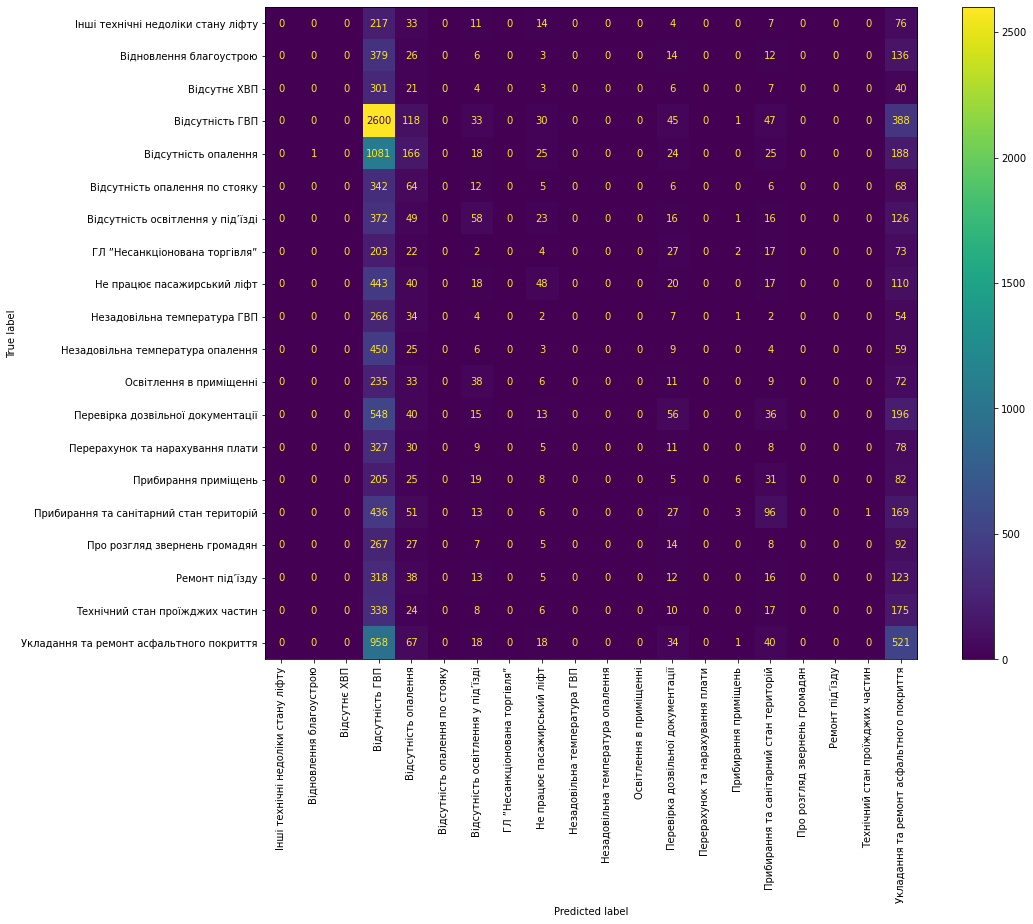

In [219]:
visualize_confusion_matrix(lr_doc2vec, X_test, y_test)

## Distribution visualization

In [128]:
# Average vectors of LexVec word embeddings
lexvec_vectors = filtered_data_lexvec[['averaged_lexvec_emb', 'CallZType']]
lexvec_vectors

,averaged_lexvec_emb,CallZType
0,"[0.04923018918918917, 0.12993851351351351, 0.1...",Відсутність ГВП
1,"[-0.05757964705882352, 0.005076882352941172, 0...",Відсутність опалення
2,"[0.091418375, 0.02071512499999999, 0.218316625...",Перевірка дозвільної документації
3,"[0.016154, 0.051735, -0.266789, 0.199207, 0.02...",Відсутність ГВП
4,"[-0.04809827586206897, 0.05558179310344826, 0....",Інші технічні недоліки стану ліфту
...,...,...
61532,"[-0.0020409090909090854, 0.034257636363636344,...",Не працює пасажирський ліфт
61533,"[-0.05897212149532711, -0.04690728037383181, 0...",ГЛ ”Несанкціонована торгівля”
61534,"[-0.041319538461538456, 0.015376961538461522, ...",Укладання та ремонт асфальтного покриття
61535,"[-0.06470576923076923, 0.11527046153846153, 0....",Відсутність освітлення у під’їзді


In [149]:
from random import sample
import matplotlib.colors as mcolors


colors = sample(list(mcolors.CSS4_COLORS.keys()), 20)
colors

['blueviolet',
 'khaki',
 'seagreen',
 'yellowgreen',
 'darkviolet',
 'black',
 'burlywood',
 'lightsteelblue',
 'thistle',
 'darkblue',
 'cornsilk',
 'skyblue',
 'tomato',
 'springgreen',
 'darkslategray',
 'lightslategray',
 'aqua',
 'indigo',
 'gainsboro',
 'olivedrab']

In [150]:
colors_labels_dict = dict(zip(lexvec_vectors['CallZType'].unique().tolist(), colors))
colors_labels_dict

{'Відсутність ГВП': 'blueviolet',
 'Відсутність опалення': 'khaki',
 'Перевірка дозвільної документації': 'seagreen',
 'Інші технічні недоліки стану ліфту': 'yellowgreen',
 'Укладання та ремонт асфальтного покриття': 'darkviolet',
 'Перерахунок та нарахування плати': 'black',
 'Не працює пасажирський ліфт': 'burlywood',
 'ГЛ ”Несанкціонована торгівля”': 'lightsteelblue',
 'Освітлення в приміщенні': 'thistle',
 'Відсутність освітлення у під’їзді': 'darkblue',
 'Про розгляд звернень громадян': 'cornsilk',
 'Ремонт під’їзду': 'skyblue',
 'Технічний стан проїжджих частин': 'tomato',
 'Прибирання та санітарний стан територій': 'springgreen',
 'Прибирання приміщень': 'darkslategray',
 'Відсутнє ХВП': 'lightslategray',
 'Незадовільна температура опалення': 'aqua',
 'Відновлення благоустрою': 'indigo',
 'Відсутність опалення по стояку': 'gainsboro',
 'Незадовільна температура ГВП': 'olivedrab'}

In [172]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(lexvec_vectors):
    labels = []
    tokens = []

    for vector in lexvec_vectors['averaged_lexvec_emb'].tolist():
        tokens.append(vector)
    
    for label in lexvec_vectors['CallZType']:
        labels.append(label)
    
    tsne_model = TSNE(perplexity=25, n_components=2, init='pca', n_iter=2500, 
                      verbose=1, n_jobs=-1, random_state=random_seed)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in tqdm(range(len(x))):
        plt.scatter(x[i],y[i], c=colors_labels_dict[labels[i]], s = 20)

    plt.show()

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.564s...
[t-SNE] Computed neighbors for 10000 samples in 11.680s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.183196
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.139931
[t-SNE] KL divergence after 2500 iterations: 2.926459


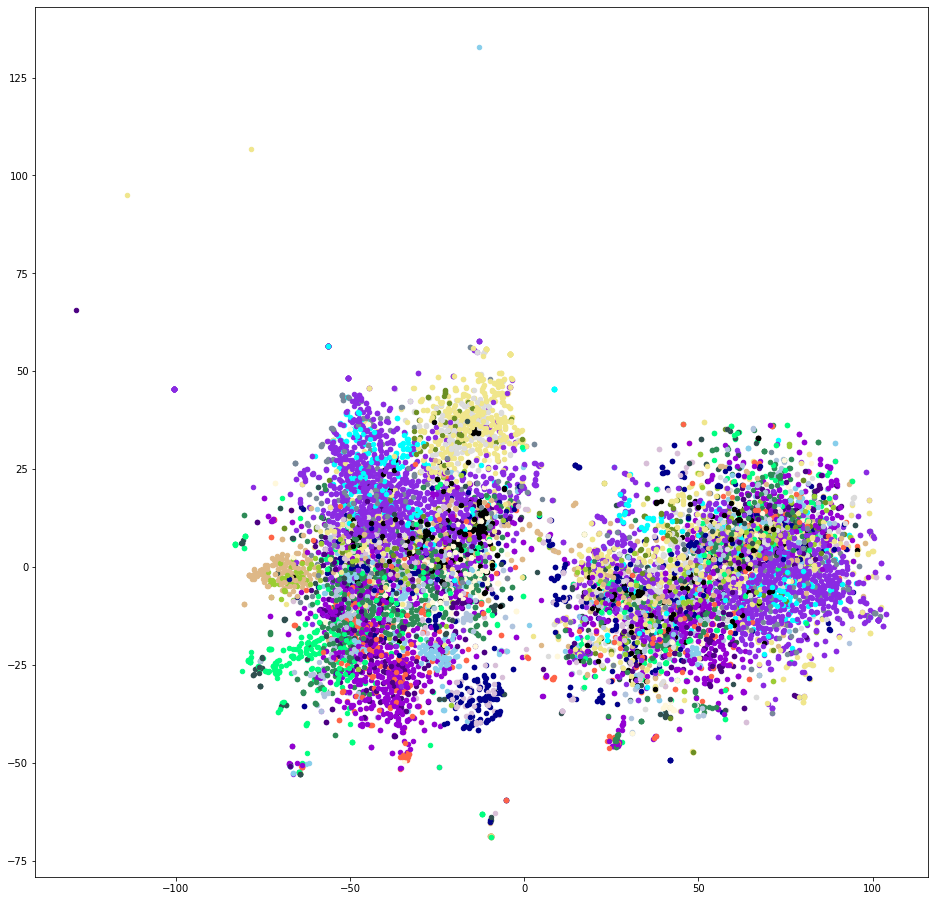

In [173]:
# Taking 10000 random elements (because of high computational complexity)
tsne_plot(lexvec_vectors.loc[sample(lexvec_vectors.index.tolist(), 10000)])

---------------------------------

# Conclusions

----

## First method - BoW (based on CountVectorizer)

| Classification model   | Additional text processing | Accuracy  |
| ---                    | ---                        | ---       |
| LogisticRegression     | -                          | 0.799     |
| __LogisticRegression__ | __stopwords removal__      | __0.803__ |
| SVM                    | -                          | 0.752     |
| Decision Tree          | -                          | 0.692     |
| Random Forest          | -                          | 0.731     |

## Second method - BoW (based on Averaged word embeddings)

| Classification model | Embeddings | Additional text processing | Accuracy |
| ---                  | ---        | ---                        | ---      |
| KNN                  | Glove      | -                          | 0.397    |
| KNN                  | Glove      | stopwords removal          | 0.450    |
| __SVM__              | __Glove__  | __-__                      | __0.532__|
| Decision Tree        | Glove      | -                          | 0.334    |
| Random Forest        | Glove      | -                          | 0.483    |
| KNN                  | Word2Vec   | -                          | 0.390    |
| KNN                  | LexVec     | -                          | 0.512    |

## Additional method - doc2vec

| Classification model   | Embeddings | Accuracy  |
| ---                    | ---        | ---       |
| LogisticRegression     | doc2vec    | 0.230     |

## Observations:

 - *__Bag-of-Words based on CountVectorizer__ in general works __much better__ than the one, __based on averaged word embeddings__ (0.799 against 0.397). I believe __the main problem with the second method__ is exactly __the averaging of these embeddings__, which cause the final vector to become mix of multiple embeddings, which __lost its representiveness__. My intuition tells that __to make this method work, we need very carefully select input words (only few the most informative)__, whose embeddings would be averaged. By doing this, we __would reduce the noise in the final averaged vector__.*
 - *__Another problem with the second method is that lots of text samples are written in Russian__, but the taken Glove embeddings are for Ukrainian language, thus doesn't work well for Russian.*
 - *__Some target classes (types) are highly similar__, like __<<__ Освітлення в приміщенні й при вході в нього __>>__  and __<<__ Відсутність освітлення у під’їзді за відсутності/несправності лампочок __>>__ or __<<__ Відсутність опалення __>>__ and __<<__ Відсутність опалення по стояку __>>__, __thus make it hard to identify the correct class.__*
 - *__Stopwords removal__ slightly improve the first method, but __there is a significant improvement for the second one__. This is mainly due to what I have described above (mix of multiple embeddings cause lots of noize), which is __slightly resolved with the removal of the words with no meaningful information.__*
 - *Other classification models (SVM, Decision Tree and Random Forest) works worse than Logistic Regression for the first method, probably require more hyperparameters tuning. __On the other hand, for the second method SVM gives a reasonable boost in the accuracy (+ 13.5%) against KNN.__*
 - *Replacing Glove embeddings with Word2Vec embeddings doesn't give any improvements for the second method, but __LexVec (improved version of Word2Vec) produce a significant boost in accuracy (+ 11.5%)__.*
 - *__I believe that by using SVM as our classification model, LexVec for embeddings and adding some text pre-processing stages (at least stopwords removal), we could achieve even higher performance of the second method.__*
 - *__doc2vec__ doesn't work at all, it __highly overfits on the most frequent class - "Відсутність ГВП".__ I believe to have doc2vec work correctly, we need much bigger corpus.*
 - *TSNE shows us, that this types can be somehow divided, because we can observe that some classes (types) are almost fully grouped in one area. But still, __this visualization shows that all these classes highly intersect between each other, so it is a challenge to correctly identify similar classes__ (which has been proved during experiments).*